# Titanic - Machine Learning from Disaster
Kaggle: https://www.kaggle.com/competitions/titanic

Guide: https://hackmd.io/@Go3PyC86QhypSl7kh5nA2Q/Hk4nXFYkK

# Note for ML
1. Observe the data. Charts are a good tool for observing the data.
2. Do feature engineering. Feature engineering involves preparing data for machine learning models through processes such as data cleaning, encoding categorical variables into numerical formats, and standardizing numerical data.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
TrainData = pd.read_csv('input/train.csv')
# TrainData = pd.read_csv('/kaggle/input/train.csv')

# Observe the data
資料，包含乘客的艙等(pClass)、性別(Sex)、年齡(Age)、兄弟姊妹＋老婆丈夫數量(SibSp)、父母小孩的數量(Parch)、票號(Ticket)、票的費用(Fare)、房間號碼(Cabin)、出發港口(Embarked)等

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup',
       'FareGroup'],
      dtype='object')
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.9

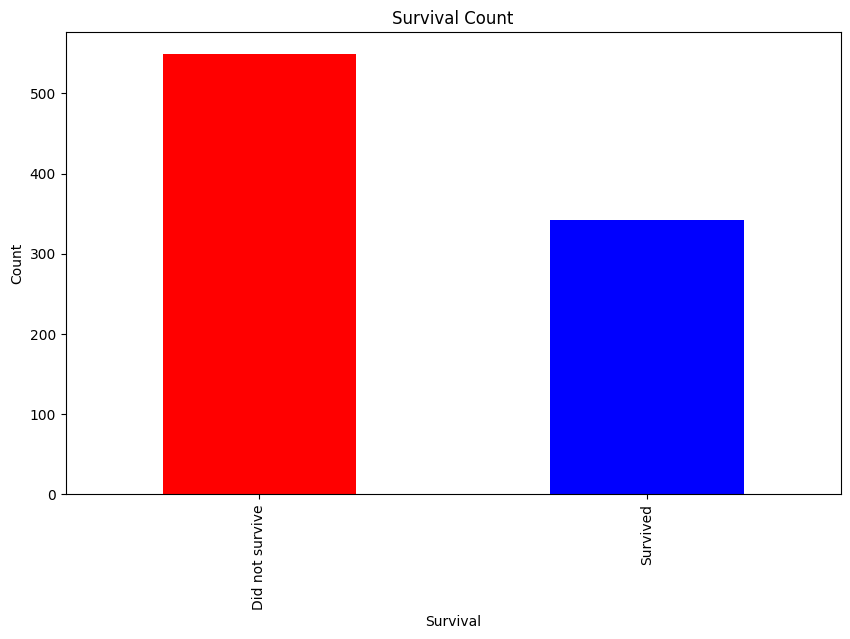

<Figure size 1000x600 with 0 Axes>

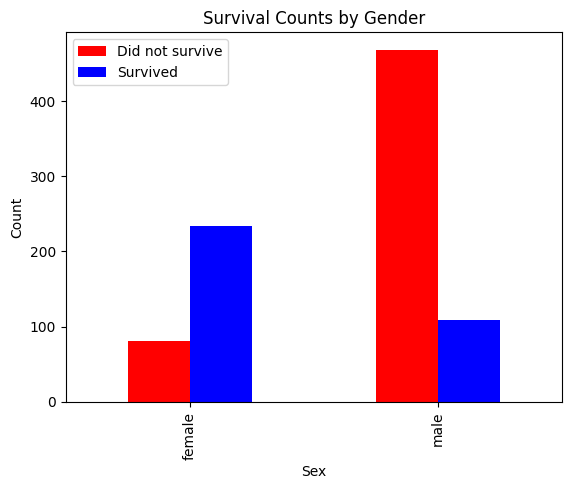

<Figure size 1000x600 with 0 Axes>

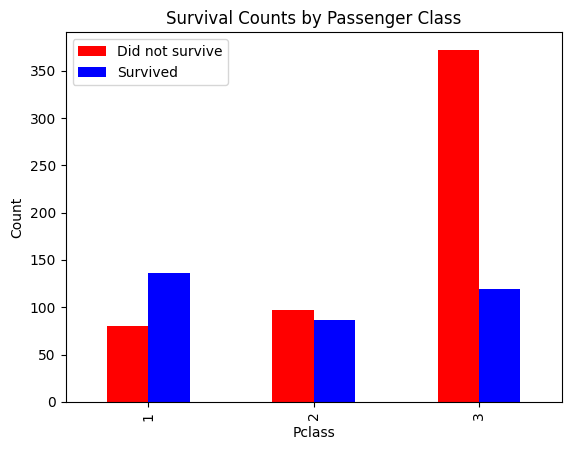

C:\Users\alanc\AppData\Local\Temp\ipykernel_15628\3010209018.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = TrainData.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

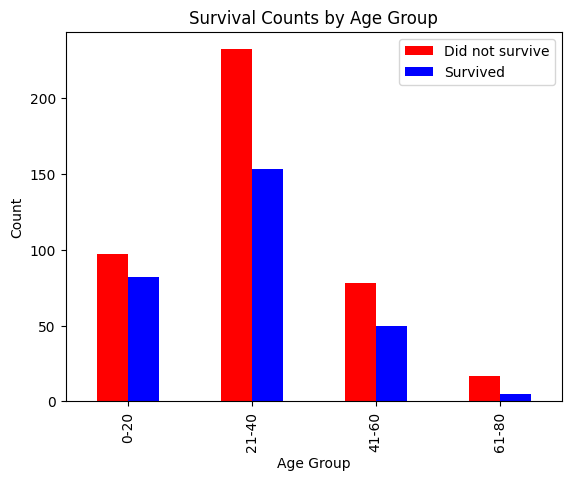

<Figure size 1000x600 with 0 Axes>

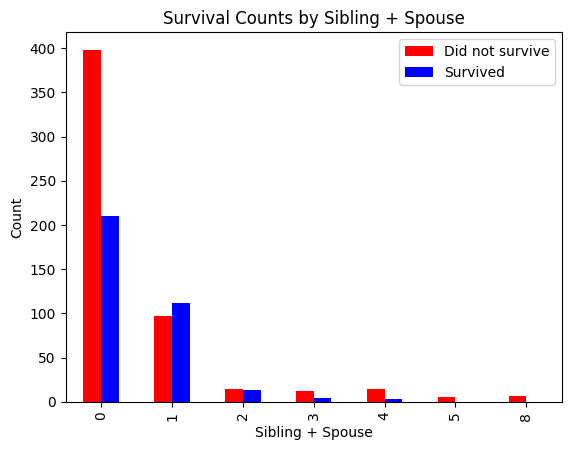

<Figure size 1000x600 with 0 Axes>

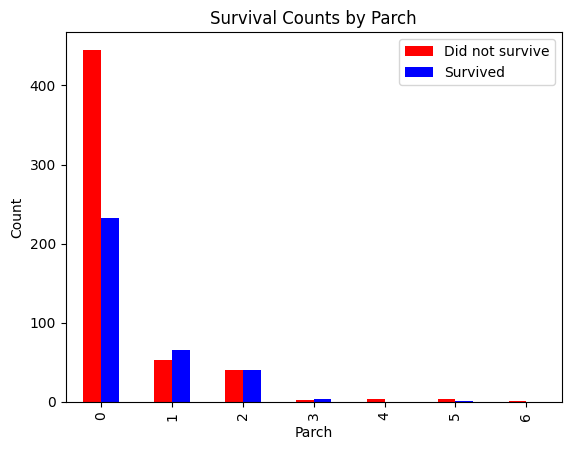

C:\Users\alanc\AppData\Local\Temp\ipykernel_15628\3010209018.py:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_group_counts = TrainData.groupby(['FareGroup', 'Survived']).size().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

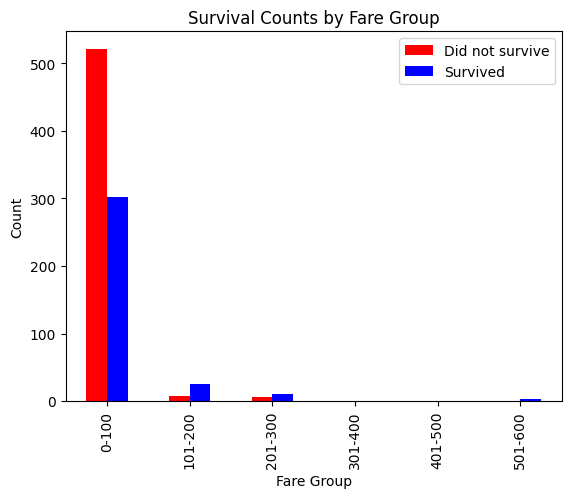

<Figure size 1000x600 with 0 Axes>

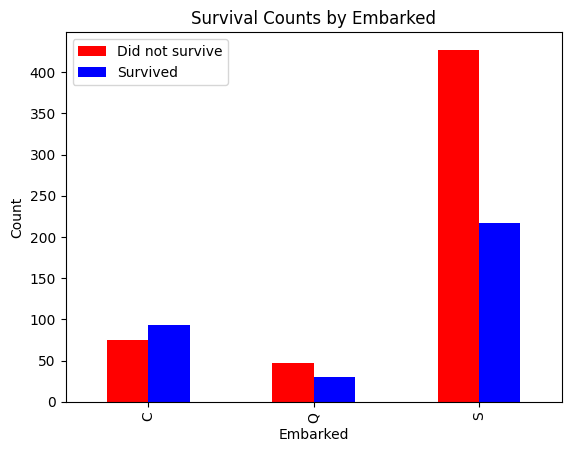

In [20]:
print(TrainData.columns)
print(TrainData.describe())

# 1st Graph: Overall survival count
value_counts = TrainData['Survived'].value_counts()
plt.figure(figsize=(10,6))
value_counts.plot(kind='bar', color=['red', 'blue'])
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Survival Count')
plt.xticks(ticks=[0, 1], labels=['Did not survive', 'Survived'])
plt.show()

# 2nd Graph: Survival counts by gender
survival_counts_gender = TrainData.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
survival_counts_gender.plot(kind='bar', stacked=False, color=['red', 'blue'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Counts by Gender')
plt.legend(['Did not survive', 'Survived'])
plt.show()

# 3rd Graph: Survival counts by passenger class
survival_counts_class = TrainData.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
survival_counts_class.plot(kind='bar', stacked=False, color=['red', 'blue'])
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Survival Counts by Passenger Class')
plt.legend(['Did not survive', 'Survived'])
plt.show()

# 4th Graph: Survival counts by age group
# Define age bins and labels
bins = [0, 20, 40, 60, 80]
labels = ['0-20', '21-40', '41-60', '61-80']
TrainData['AgeGroup'] = pd.cut(TrainData['Age'], bins=bins, labels=labels)
age_group_counts = TrainData.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
age_group_counts.plot(kind='bar', stacked=False, color=['red', 'blue'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Survival Counts by Age Group')
plt.legend(['Did not survive', 'Survived'])
plt.show()

# 5th Graph: Survival counts by Sibling + Spouse
survival_counts_class = TrainData.groupby(['SibSp', 'Survived']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
survival_counts_class.plot(kind='bar', stacked=False, color=['red', 'blue'])
plt.xlabel('Sibling + Spouse')
plt.ylabel('Count')
plt.title('Survival Counts by Sibling + Spouse')
plt.legend(['Did not survive', 'Survived'])
plt.show()

# 6th Graph: Survival counts by Parch
survival_counts_class = TrainData.groupby(['Parch', 'Survived']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
survival_counts_class.plot(kind='bar', stacked=False, color=['red', 'blue'])
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Survival Counts by Parch')
plt.legend(['Did not survive', 'Survived'])
plt.show()

# 7th Graph: Survival counts by Fare group
# Define age bins and labels
bins = [0, 100, 200, 300, 400, 500, 600]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600']
TrainData['FareGroup'] = pd.cut(TrainData['Fare'], bins=bins, labels=labels)
fare_group_counts = TrainData.groupby(['FareGroup', 'Survived']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
fare_group_counts.plot(kind='bar', stacked=False, color=['red', 'blue'])
plt.xlabel('Fare Group')
plt.ylabel('Count')
plt.title('Survival Counts by Fare Group')
plt.legend(['Did not survive', 'Survived'])
plt.show()

# 8th Graph: Survival counts by Embarked
survival_counts_class = TrainData.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
survival_counts_class.plot(kind='bar', stacked=False, color=['red', 'blue'])
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survival Counts by Embarked')
plt.legend(['Did not survive', 'Survived'])
plt.show()

# Conclusion of Observation
**Gender** can significantly influence survival; the probability of survival for **women** is higher than for men. Passenger **class** also affects the survival rate: **the higher the class**, the greater the likelihood of survival. Additionally, **fare** influences the survival rate: **the higher the fare**, the greater the probability of survival.

In conclusion, **gender** and **wealth** have the most impact on survival.